# Dynamic Time Warping (DTW)
DTW distance between two samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [2]:
def DTW(s, t, w = -1):
    '''
    Dynamic time warping of two signals
    Python version by Seung-Chan Kim
    '''
    s = np.ravel(s) 
    t = np.ravel(t)
    #print(np.shape(s)) #(100,)
    #print(np.shape(t))
    ns = np.shape(s)[-1]
    nt = np.shape(t)[-1]
 
    if w<0:
        w = nt //10
        
    w = np.max(w, np.abs(ns-nt)); # adapt window size
    
    # cache matrix
    D= np.ones( (ns+1,nt+1)) *-1
    
    D[0][0] = 0
    
    # Begin dynamic programming
    for i in range(ns):
        ii = i+1
        
        j1 = np.max((ii-w,1))
        j2 = np.min((ii+w,nt))
        
        jw = j2 - j1#+1
        
        for j in range(jw):
            jj = j+j1
            cost= np.sqrt ((s[i]-t[jj-1])*(s[i]-t[jj-1]))
            
            temp=D[ii-1][jj]
            if D[ii][jj-1]!=-1:
                if temp==-1 or D[ii][jj-1]<temp :
                    temp=D[ii][jj-1]
                    
            if D[ii-1][jj-1]!=-1:
                if temp==-1 or D[ii-1][jj-1]<temp: 
                    temp=D[ii-1][jj-1]
                    
            D[ii][jj]=cost+temp
            # D(i+1,j+1)=oost+min( [D(i,j+1), D(i+1,j), D(i,j)] );
            
    # resulting distance
    d=D[ns-1][nt-1]
    
    return d

In [12]:
def DTW2(s, t, w = -1):
    '''
    Dynamic time warping of two signals
    Python version by Seung-Chan Kim
    '''
    s = np.ravel(s) 
    t = np.ravel(t)
    #print(np.shape(s)) #(100,)
    #print(np.shape(t))
    ns = np.shape(s)[-1]
    nt = np.shape(t)[-1]
 
    if w<0:
        w = nt //10
        
    w = np.max(w, np.abs(ns-nt)); # adapt window size
    
    # cache matrix
    D= np.zeros( (ns+1,nt+1)) + np.Inf
    
    D[0][0] = 0
    
    # Begin dynamic programming
    for i in range(ns):
        ii = i+1
        
        j1 = np.max((ii-w,1))
        j2 = np.min((ii+w,nt))
        
        jw = j2 - j1#+1
        
        for j in range(jw):
            jj = j+j1
            cost= np.sqrt ((s[i]-t[jj-1])*(s[i]-t[jj-1]))
            
            temp = np.min((D[ii-1,jj], D[ii,jj-1], D[ii-1, jj-1]))
            D[ii][jj]=cost+temp
            # D(i+1,j+1)=oost+min( [D(i,j+1), D(i+1,j), D(i,j)] );
            
    # resulting distance
    d=D[ns-1][nt-1]
    
    return d#, D

```
D=zeros(ns+1,nt+1)+Inf; % cache matrix
D(1,1)=0;
...
%% begin dynamic programming
for i=1:ns
    for j=max(i-w,1):min(i+w,nt)
        oost=norm(s(i,:)-t(j,:));
        D(i+1,j+1)=oost+min( [D(i,j+1), D(i+1,j), D(i,j)] );
        
    end
end
```

Text(0.5, 1.0, 'DTW cost =66.276 66.276')

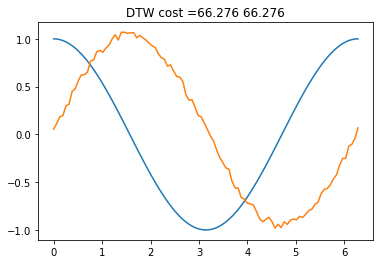

In [4]:
## A noisy sine wave as query
idx = np.linspace(0,2*pi,num=100)
r = np.random.uniform(size=100)/10.0
query = np.sin(idx) + r

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)
d = DTW(query, template)
d2 = DTW2(query, template)
plt.figure()
plt.plot(idx, template)
plt.plot(idx, query)
plt.title('DTW cost ={:.3f} {:.3f}'.format(d, d2))

In [5]:
outDir = 'dtwout'

In [6]:
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [11]:
template = np.sin(idx)
ndiv = 100
vcost =[]
for i in range(ndiv):
    query = np.sin(idx + 2*pi* i/ndiv)
    d = DTW(query, template)
    
    d2 = DTW2(query, template) 
    #d2, D = DTW2(query, template) 
    #np.savetxt(os.path.join(outDir, 'match_{:02d}.txt'.format(i)), D,  fmt = '%.3f', delimiter = '\t',)
    vcost.append(d)
    
    fig = plt.figure()
    plt.plot(template)
    plt.plot(query)
    plt.title('DTW cost ={:.3f} {:.3f}'.format(d, d2))
    
    plt.savefig(os.path.join(outDir, 'dtw_{:02d}.png'.format(i)))
    plt.close()

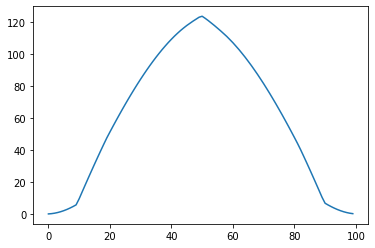

In [8]:
plt.plot(vcost)

### TODO
* 다른 구현과 실제 계산값 비교

### References

* An matlab implementation of DTW by Quan Wang @RPI
* https://github.com/dalek7/DTW/blob/master/DDSignal.java